In [67]:
# Import libraries and dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initially found "NONE" in the 

bakery.drop(bakery[bakery['Item']=='NONE'].index, inplace=True)

In [68]:
bakery = pd.read_csv("BreadBasket_DMS.csv")
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [69]:
print(len(bakery))
print(bakery.describe())

21293
        Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000


In [94]:
bakery_top = bakery["Item"].value_counts()[:10]
bakery_top

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64

In [74]:
bakery[["Date", "Time"]].groupby("Item")

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [78]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
Date           20507 non-null object
Time           20507 non-null object
Transaction    20507 non-null int64
Item           20507 non-null object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


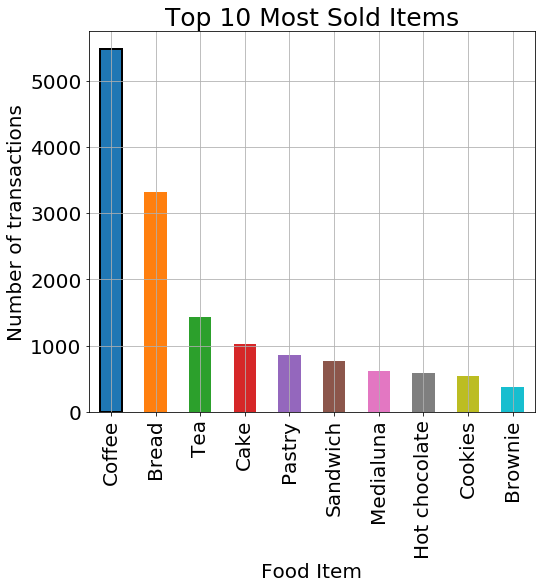

In [86]:
fig, ax=plt.subplots(figsize=(8,7))
bakery['Item'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Top 10 Most Sold Items',fontsize=25)
plt.grid()
plt.show()

In [99]:
bakery.loc[bakery['Time']<'12:00:00','Daytime']='Morning'
bakery.loc[(bakery['Time']>='12:00:00')&(bakery['Time']<'17:00:00'),'Daytime']='Afternoon'
bakery.loc[(bakery['Time']>='17:00:00')&(bakery['Time']<'20:00:00'),'Daytime']='Evening'
bakery.loc[(bakery['Time']>='20:00:00')&(bakery['Time']<'23:50:00'),'Daytime']='Night'

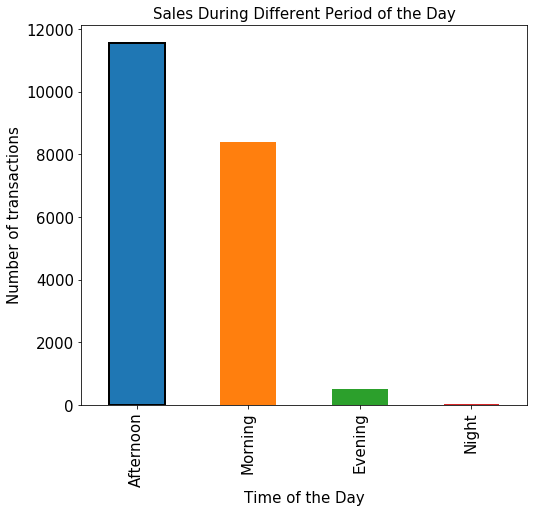

In [109]:
fig, ax=plt.subplots(figsize=(8,7))
bakery['Daytime'].value_counts().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Time of the Day',fontsize=15)
plt.ylabel('Number of transactions',fontsize=15)
ax.tick_params(labelsize=15)
plt.title('Sales During Different Period of the Day',fontsize=15)
plt.show()